# The gender gap in unemployment

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib_venn import venn2

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject

# Read and clean data

Import your data, either through an API or manually, and load it. 

In [2]:
#importing data and removing first 2 rows, as they are empty
unemp = pd.read_excel('/Users/nadahadraoui/Library/CloudStorage/OneDrive-UniversityofCopenhagen/Introduction to programming/Project/projects-2022-team-hjn/dataproject/AULP01.xlsx',skiprows=3, na_filter=False)
industries = pd.read_excel('/Users/nadahadraoui/Library/CloudStorage/OneDrive-UniversityofCopenhagen/Introduction to programming/Project/projects-2022-team-hjn/dataproject/AKU220K.xlsx', na_filter=False)

In [3]:
#looking at the data
unemp

,Unnamed: 0,TOT I alt,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,M Mænd,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,K Kvinder,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,,000 Hele landet,084 Region Hovedstaden,085 Region Sjælland,083 Region Syddanmark,082 Region Midtjylland,081 Region Nordjylland,000 Hele landet,084 Region Hovedstaden,085 Region Sjælland,083 Region Syddanmark,082 Region Midtjylland,081 Region Nordjylland,000 Hele landet,084 Region Hovedstaden,085 Region Sjælland,083 Region Syddanmark,082 Region Midtjylland,081 Region Nordjylland
1,2007,3.6,4,3.5,3.3,2.9,4.5,2.9,3.7,2.7,2.6,2.2,3.3,4.4,4.4,4.3,4.2,3.7,5.9
2,2008,2.6,3,2.6,2.4,2.1,3.2,2.4,3,2.4,2.1,1.8,2.7,2.9,3.1,2.8,2.7,2.4,3.7
3,2009,4.8,4.7,4.7,4.8,4.5,5.7,5.5,5.3,5.4,5.4,5.1,6.5,4.1,4.1,3.9,4,3.8,4.8
4,2010,6.1,6,6.2,6.2,5.6,6.6,6.9,6.7,7.2,7.1,6.3,7.7,5.1,5.2,5.1,5.2,4.8,5.5
5,2011,5.9,6,6.2,6.1,5.3,6.3,6.2,6.4,6.4,6.4,5.3,6.6,5.7,5.7,5.9,5.7,5.3,5.9
6,2012,6,6.2,6.2,6.3,5.3,6.1,6.1,6.3,6.2,6.4,5.1,6.1,6,6,6.2,6.2,5.6,6
7,2013,5.8,6,5.8,5.9,5.1,5.6,5.7,6.2,5.8,5.8,4.9,5.6,5.8,5.8,5.9,6,5.3,5.7
8,2014,5,5.3,5,4.9,4.3,5.3,4.8,5.3,4.9,4.7,4,5.2,5.2,5.3,5.1,5.2,4.7,5.4
9,2015,4.5,4.7,4.6,4.6,3.9,5,4.4,4.6,4.4,4.4,3.5,4.8,4.8,4.8,4.7,4.7,4.3,5.3


In [4]:
#Renaming columns
unemp = unemp.rename(columns={"Unnamed: 0": "Years","TOT I alt":"Entire country (All)","Unnamed: 2":"Capital region (All)","Unnamed: 3":"Zealand (All)","Unnamed: 4":"South Denmark (All)","Unnamed: 5":"Mid Jutland (All)","Unnamed: 6":"Northern Jutland (A)", "M Mænd":"Entire Country (M)", "Unnamed: 8":"Capital region (M)","Unnamed: 9":"Zealand (M)","Unnamed: 10":"South Denmark (M)","Unnamed: 11":"Mid Jutland (M)","Unnamed: 12":"Northern Jutland (M)","K Kvinder":"Entire country (W)","Unnamed: 14":"Capital region (W)","Unnamed: 15":"Zealand (W)","Unnamed: 16":"South Denmark (W)","Unnamed: 17":"Mid Jutland (W)","Unnamed: 18":"Northern Jutland (W)"})
unemp

,Years,Entire country (All),Capital region (All),Zealand (All),South Denmark (All),Mid Jutland (All),Northern Jutland (A),Entire Country (M),Capital region (M),Zealand (M),South Denmark (M),Mid Jutland (M),Northern Jutland (M),Entire country (W),Capital region (W),Zealand (W),South Denmark (W),Mid Jutland (W),Northern Jutland (W)
0,,000 Hele landet,084 Region Hovedstaden,085 Region Sjælland,083 Region Syddanmark,082 Region Midtjylland,081 Region Nordjylland,000 Hele landet,084 Region Hovedstaden,085 Region Sjælland,083 Region Syddanmark,082 Region Midtjylland,081 Region Nordjylland,000 Hele landet,084 Region Hovedstaden,085 Region Sjælland,083 Region Syddanmark,082 Region Midtjylland,081 Region Nordjylland
1,2007,3.6,4,3.5,3.3,2.9,4.5,2.9,3.7,2.7,2.6,2.2,3.3,4.4,4.4,4.3,4.2,3.7,5.9
2,2008,2.6,3,2.6,2.4,2.1,3.2,2.4,3,2.4,2.1,1.8,2.7,2.9,3.1,2.8,2.7,2.4,3.7
3,2009,4.8,4.7,4.7,4.8,4.5,5.7,5.5,5.3,5.4,5.4,5.1,6.5,4.1,4.1,3.9,4,3.8,4.8
4,2010,6.1,6,6.2,6.2,5.6,6.6,6.9,6.7,7.2,7.1,6.3,7.7,5.1,5.2,5.1,5.2,4.8,5.5
5,2011,5.9,6,6.2,6.1,5.3,6.3,6.2,6.4,6.4,6.4,5.3,6.6,5.7,5.7,5.9,5.7,5.3,5.9
6,2012,6,6.2,6.2,6.3,5.3,6.1,6.1,6.3,6.2,6.4,5.1,6.1,6,6,6.2,6.2,5.6,6
7,2013,5.8,6,5.8,5.9,5.1,5.6,5.7,6.2,5.8,5.8,4.9,5.6,5.8,5.8,5.9,6,5.3,5.7
8,2014,5,5.3,5,4.9,4.3,5.3,4.8,5.3,4.9,4.7,4,5.2,5.2,5.3,5.1,5.2,4.7,5.4
9,2015,4.5,4.7,4.6,4.6,3.9,5,4.4,4.6,4.4,4.4,3.5,4.8,4.8,4.8,4.7,4.7,4.3,5.3


In [5]:
#dropping row 0
unemp=unemp.drop(0).head(16)
unemp

,Years,Entire country (All),Capital region (All),Zealand (All),South Denmark (All),Mid Jutland (All),Northern Jutland (A),Entire Country (M),Capital region (M),Zealand (M),South Denmark (M),Mid Jutland (M),Northern Jutland (M),Entire country (W),Capital region (W),Zealand (W),South Denmark (W),Mid Jutland (W),Northern Jutland (W)
1,2007,3.6,4,3.5,3.3,2.9,4.5,2.9,3.7,2.7,2.6,2.2,3.3,4.4,4.4,4.3,4.2,3.7,5.9
2,2008,2.6,3,2.6,2.4,2.1,3.2,2.4,3,2.4,2.1,1.8,2.7,2.9,3.1,2.8,2.7,2.4,3.7
3,2009,4.8,4.7,4.7,4.8,4.5,5.7,5.5,5.3,5.4,5.4,5.1,6.5,4.1,4.1,3.9,4,3.8,4.8
4,2010,6.1,6,6.2,6.2,5.6,6.6,6.9,6.7,7.2,7.1,6.3,7.7,5.1,5.2,5.1,5.2,4.8,5.5
5,2011,5.9,6,6.2,6.1,5.3,6.3,6.2,6.4,6.4,6.4,5.3,6.6,5.7,5.7,5.9,5.7,5.3,5.9
6,2012,6,6.2,6.2,6.3,5.3,6.1,6.1,6.3,6.2,6.4,5.1,6.1,6,6,6.2,6.2,5.6,6
7,2013,5.8,6,5.8,5.9,5.1,5.6,5.7,6.2,5.8,5.8,4.9,5.6,5.8,5.8,5.9,6,5.3,5.7
8,2014,5,5.3,5,4.9,4.3,5.3,4.8,5.3,4.9,4.7,4,5.2,5.2,5.3,5.1,5.2,4.7,5.4
9,2015,4.5,4.7,4.6,4.6,3.9,5,4.4,4.6,4.4,4.4,3.5,4.8,4.8,4.8,4.7,4.7,4.3,5.3
10,2016,4.1,4.3,4.1,4.2,3.6,4.5,3.9,4.1,3.9,4,3.2,4.2,4.4,4.4,4.3,4.3,4,4.9


In [6]:
#Dropping last two rows
unemp.drop(unemp.tail(2).index,inplace=True)
unemp

,Years,Entire country (All),Capital region (All),Zealand (All),South Denmark (All),Mid Jutland (All),Northern Jutland (A),Entire Country (M),Capital region (M),Zealand (M),South Denmark (M),Mid Jutland (M),Northern Jutland (M),Entire country (W),Capital region (W),Zealand (W),South Denmark (W),Mid Jutland (W),Northern Jutland (W)
1,2007,3.6,4,3.5,3.3,2.9,4.5,2.9,3.7,2.7,2.6,2.2,3.3,4.4,4.4,4.3,4.2,3.7,5.9
2,2008,2.6,3,2.6,2.4,2.1,3.2,2.4,3,2.4,2.1,1.8,2.7,2.9,3.1,2.8,2.7,2.4,3.7
3,2009,4.8,4.7,4.7,4.8,4.5,5.7,5.5,5.3,5.4,5.4,5.1,6.5,4.1,4.1,3.9,4,3.8,4.8
4,2010,6.1,6,6.2,6.2,5.6,6.6,6.9,6.7,7.2,7.1,6.3,7.7,5.1,5.2,5.1,5.2,4.8,5.5
5,2011,5.9,6,6.2,6.1,5.3,6.3,6.2,6.4,6.4,6.4,5.3,6.6,5.7,5.7,5.9,5.7,5.3,5.9
6,2012,6,6.2,6.2,6.3,5.3,6.1,6.1,6.3,6.2,6.4,5.1,6.1,6,6,6.2,6.2,5.6,6
7,2013,5.8,6,5.8,5.9,5.1,5.6,5.7,6.2,5.8,5.8,4.9,5.6,5.8,5.8,5.9,6,5.3,5.7
8,2014,5,5.3,5,4.9,4.3,5.3,4.8,5.3,4.9,4.7,4,5.2,5.2,5.3,5.1,5.2,4.7,5.4
9,2015,4.5,4.7,4.6,4.6,3.9,5,4.4,4.6,4.4,4.4,3.5,4.8,4.8,4.8,4.7,4.7,4.3,5.3
10,2016,4.1,4.3,4.1,4.2,3.6,4.5,3.9,4.1,3.9,4,3.2,4.2,4.4,4.4,4.3,4.3,4,4.9


In [7]:
#reseting indices
unemp=unemp.reset_index(level=None, drop=True, inplace=False, col_level=0, col_fill='')
unemp

,Years,Entire country (All),Capital region (All),Zealand (All),South Denmark (All),Mid Jutland (All),Northern Jutland (A),Entire Country (M),Capital region (M),Zealand (M),South Denmark (M),Mid Jutland (M),Northern Jutland (M),Entire country (W),Capital region (W),Zealand (W),South Denmark (W),Mid Jutland (W),Northern Jutland (W)
0,2007,3.6,4,3.5,3.3,2.9,4.5,2.9,3.7,2.7,2.6,2.2,3.3,4.4,4.4,4.3,4.2,3.7,5.9
1,2008,2.6,3,2.6,2.4,2.1,3.2,2.4,3,2.4,2.1,1.8,2.7,2.9,3.1,2.8,2.7,2.4,3.7
2,2009,4.8,4.7,4.7,4.8,4.5,5.7,5.5,5.3,5.4,5.4,5.1,6.5,4.1,4.1,3.9,4,3.8,4.8
3,2010,6.1,6,6.2,6.2,5.6,6.6,6.9,6.7,7.2,7.1,6.3,7.7,5.1,5.2,5.1,5.2,4.8,5.5
4,2011,5.9,6,6.2,6.1,5.3,6.3,6.2,6.4,6.4,6.4,5.3,6.6,5.7,5.7,5.9,5.7,5.3,5.9
5,2012,6,6.2,6.2,6.3,5.3,6.1,6.1,6.3,6.2,6.4,5.1,6.1,6,6,6.2,6.2,5.6,6
6,2013,5.8,6,5.8,5.9,5.1,5.6,5.7,6.2,5.8,5.8,4.9,5.6,5.8,5.8,5.9,6,5.3,5.7
7,2014,5,5.3,5,4.9,4.3,5.3,4.8,5.3,4.9,4.7,4,5.2,5.2,5.3,5.1,5.2,4.7,5.4
8,2015,4.5,4.7,4.6,4.6,3.9,5,4.4,4.6,4.4,4.4,3.5,4.8,4.8,4.8,4.7,4.7,4.3,5.3
9,2016,4.1,4.3,4.1,4.2,3.6,4.5,3.9,4.1,3.9,4,3.2,4.2,4.4,4.4,4.3,4.3,4,4.9


In [ ]:
####plotting unemployment (pct.) for women, men and in total 

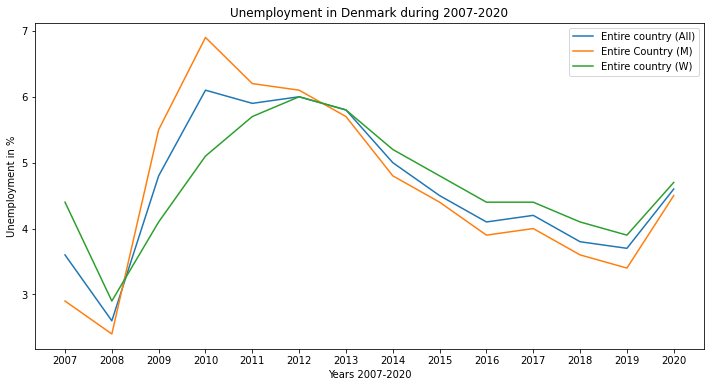

In [8]:
unemp[['Entire country (All)', 'Entire Country (M)', 'Entire country (W)']].plot(figsize=(12,6))
x = list(range(len(unemp["Years"])))
plt.ylabel('Unemployment in %')
plt.xlabel('Years 2007-2020')
plt.xticks(x, unemp["Years"])
plt.title('Unemployment in Denmark during 2007-2020')
plt.show()

We see that unemployment is generally higher for women than men during the period 2007-2008. An exception to this is during the financial crisis and the following years where unemployment for men was higher.  

Looking at dataset for industries. We want to see if the difference in employment rates between women and men can be explained by them working in different industries.

In [9]:
industries

,"Beskæftigede efter branche (DB07 10-grp.), tid, køn og område",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,Enhed: 1.000 personer,,,,,,,,,,,,,,,,,,,
1,,,I alt,,,,,,Mænd,,,,,,Kvinder,,,,,
2,,,Hele landet,Region Hovedstaden,Region Sjælland,Region Syddanmark,Region Midtjylland,Region Nordjylland,Hele landet,Region Hovedstaden,Region Sjælland,Region Syddanmark,Region Midtjylland,Region Nordjylland,Hele landet,Region Hovedstaden,Region Sjælland,Region Syddanmark,Region Midtjylland,Region Nordjylland
3,TOT Erhverv i alt,2008K1,2726,857,393,576,626,275,1444,438,208,310,336,152,1282,419,185,266,290,123
4,,2020K1,2767,936,366,555,638,272,1453,479,185,292,349,148,1314,457,180,263,290,125
5,"1 Landbrug, skovbrug og fiskeri",2008K1,63,..,7,23,19,11,46,..,5,17,14,7,17,..,..,6,5,..
6,,2020K1,52,..,6,14,20,11,40,..,4,9,16,9,12,..,..,5,4,..
7,"2 Industri, råstofindvinding og forsyningsvirk...",2008K1,430,85,51,118,122,53,300,52,37,83,89,39,130,34,13,36,33,14
8,,2020K1,342,77,41,86,98,40,242,43,28,64,73,33,100,34,13,21,25,8
9,3 Bygge og anlæg,2008K1,196,47,38,46,45,20,178,43,33,41,42,19,18,5,5,5,..,..


In [10]:
#renaming columns
industries = industries.rename(columns={"Beskæftigede efter branche (DB07 10-grp.), tid, køn og område": "Industries","Unnamed: 1":"Years","Unnamed: 2":"Entire country (All)","Unnamed: 3":"Capital region (All)","Unnamed: 4":"Zealand (All)","Unnamed: 5":"South Denmark (All)","Unnamed: 6":"Mid Jutland (All)", "Unnamed: 7":"Northern Jutland (M)", "Unnamed: 8":"Entire country (M)","Unnamed: 9":"Capital region (M)","Unnamed: 10":"Zealand (M)","Unnamed: 11":"South Denmark (M)","Unnamed: 12":"Mid Jutland (M)","Unnamed: 13":"Northern Jutland (M)","Unnamed: 14":"Entire country (W)","Unnamed: 15":"Capital region (W)","Unnamed: 16":"Zealand (W)","Unnamed: 17":"South Denmark (W)","Unnamed: 18":"Mid Jutland (W)", "Unnamed: 19":"Northern Jutland (W)", })
industries

,Industries,Years,Entire country (All),Capital region (All),Zealand (All),South Denmark (All),Mid Jutland (All),Northern Jutland (M),Entire country (M),Capital region (M),Zealand (M),South Denmark (M),Northern Jutland (M),Unnamed: 13,Entire country (W),Capital region (W),Zealand (W),South Denmark (W),Northern Jutland (W),Unnamed: 19
0,Enhed: 1.000 personer,,,,,,,,,,,,,,,,,,,
1,,,I alt,,,,,,Mænd,,,,,,Kvinder,,,,,
2,,,Hele landet,Region Hovedstaden,Region Sjælland,Region Syddanmark,Region Midtjylland,Region Nordjylland,Hele landet,Region Hovedstaden,Region Sjælland,Region Syddanmark,Region Midtjylland,Region Nordjylland,Hele landet,Region Hovedstaden,Region Sjælland,Region Syddanmark,Region Midtjylland,Region Nordjylland
3,TOT Erhverv i alt,2008K1,2726,857,393,576,626,275,1444,438,208,310,336,152,1282,419,185,266,290,123
4,,2020K1,2767,936,366,555,638,272,1453,479,185,292,349,148,1314,457,180,263,290,125
5,"1 Landbrug, skovbrug og fiskeri",2008K1,63,..,7,23,19,11,46,..,5,17,14,7,17,..,..,6,5,..
6,,2020K1,52,..,6,14,20,11,40,..,4,9,16,9,12,..,..,5,4,..
7,"2 Industri, råstofindvinding og forsyningsvirk...",2008K1,430,85,51,118,122,53,300,52,37,83,89,39,130,34,13,36,33,14
8,,2020K1,342,77,41,86,98,40,242,43,28,64,73,33,100,34,13,21,25,8
9,3 Bygge og anlæg,2008K1,196,47,38,46,45,20,178,43,33,41,42,19,18,5,5,5,..,..


In [12]:
##dropping row 0, 1 and 2
industries=industries.drop([0,1,2]).head(24)


KeyError: '[0, 1, 2] not found in axis'

In [13]:
industries

,Industries,Years,Entire country (All),Capital region (All),Zealand (All),South Denmark (All),Mid Jutland (All),Northern Jutland (M),Entire country (M),Capital region (M),Zealand (M),South Denmark (M),Northern Jutland (M),Unnamed: 13,Entire country (W),Capital region (W),Zealand (W),South Denmark (W),Northern Jutland (W),Unnamed: 19
3,TOT Erhverv i alt,2008K1,2726,857,393,576,626,275,1444,438,208,310,336,152,1282,419,185,266,290,123
4,,2020K1,2767,936,366,555,638,272,1453,479,185,292,349,148,1314,457,180,263,290,125
5,"1 Landbrug, skovbrug og fiskeri",2008K1,63,..,7,23,19,11,46,..,5,17,14,7,17,..,..,6,5,..
6,,2020K1,52,..,6,14,20,11,40,..,4,9,16,9,12,..,..,5,4,..
7,"2 Industri, råstofindvinding og forsyningsvirk...",2008K1,430,85,51,118,122,53,300,52,37,83,89,39,130,34,13,36,33,14
8,,2020K1,342,77,41,86,98,40,242,43,28,64,73,33,100,34,13,21,25,8
9,3 Bygge og anlæg,2008K1,196,47,38,46,45,20,178,43,33,41,42,19,18,5,5,5,..,..
10,,2020K1,163,39,30,40,35,18,149,35,27,37,33,17,14,4,4,4,..,..
11,4 Handel og transport mv.,2008K1,629,188,95,136,151,60,373,106,57,82,91,37,257,82,38,54,59,23
12,,2020K1,651,211,88,141,152,59,386,125,56,84,88,33,265,86,32,57,64,26


In [14]:
#reseting indices
industries=industries.reset_index(level=None, drop=True, inplace=False, col_level=0, col_fill='')

In [15]:
industries

,Industries,Years,Entire country (All),Capital region (All),Zealand (All),South Denmark (All),Mid Jutland (All),Northern Jutland (M),Entire country (M),Capital region (M),Zealand (M),South Denmark (M),Northern Jutland (M),Unnamed: 13,Entire country (W),Capital region (W),Zealand (W),South Denmark (W),Northern Jutland (W),Unnamed: 19
0,TOT Erhverv i alt,2008K1,2726,857,393,576,626,275,1444,438,208,310,336,152,1282,419,185,266,290,123
1,,2020K1,2767,936,366,555,638,272,1453,479,185,292,349,148,1314,457,180,263,290,125
2,"1 Landbrug, skovbrug og fiskeri",2008K1,63,..,7,23,19,11,46,..,5,17,14,7,17,..,..,6,5,..
3,,2020K1,52,..,6,14,20,11,40,..,4,9,16,9,12,..,..,5,4,..
4,"2 Industri, råstofindvinding og forsyningsvirk...",2008K1,430,85,51,118,122,53,300,52,37,83,89,39,130,34,13,36,33,14
5,,2020K1,342,77,41,86,98,40,242,43,28,64,73,33,100,34,13,21,25,8
6,3 Bygge og anlæg,2008K1,196,47,38,46,45,20,178,43,33,41,42,19,18,5,5,5,..,..
7,,2020K1,163,39,30,40,35,18,149,35,27,37,33,17,14,4,4,4,..,..
8,4 Handel og transport mv.,2008K1,629,188,95,136,151,60,373,106,57,82,91,37,257,82,38,54,59,23
9,,2020K1,651,211,88,141,152,59,386,125,56,84,88,33,265,86,32,57,64,26


In [ ]:
data.columns= ["industries]
plt.title("Indian Unemployment")
sns.histplot(x="Estimated Employed", hue="Region", data=data)
plt.show()

## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

**Interactive plot** :

In [14]:
def plot_func():
    # Function that operates on data set
    pass

widgets.interact(plot_func, 
    # Let the widget interact with data through plot_func()    
); 


interactive(children=(Output(),), _dom_classes=('widget-interact',))

Explain what you see when moving elements of the interactive plot around. 

# Merge data sets

Now you create combinations of your loaded data sets. Remember the illustration of a (inner) **merge**:

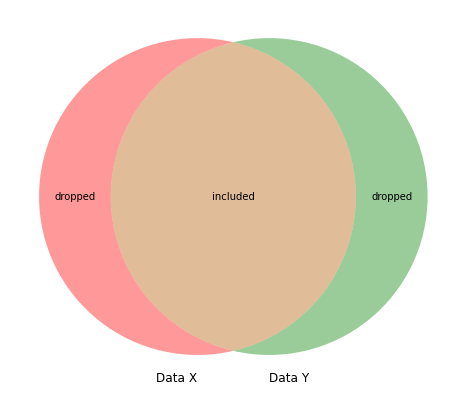

In [18]:
plt.figure(figsize=(15,7))
v = venn2(subsets = (4, 4, 10), set_labels = ('Data X', 'Data Y'))
v.get_label_by_id('100').set_text('dropped')
v.get_label_by_id('010').set_text('dropped' )
v.get_label_by_id('110').set_text('included')
plt.show()

Here we are dropping elements from both data set X and data set Y. A left join would keep all observations in data X intact and subset only from Y. 

Make sure that your resulting data sets have the correct number of rows and columns. That is, be clear about which observations are thrown away. 

**Note:** Don't make Venn diagrams in your own data project. It is just for exposition. 

# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.